In [1]:
import pandas as pd
import numpy as np
# show max columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv('Data\export.csv')

C:\Users\yuyum\AppData\Local\Temp\ipykernel_19128\2454838026.py:1: DtypeWarning: Columns (10,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv('Data\export.csv')


In [3]:
df = df_raw.copy()

In [4]:
display(df.head(), df.shape)

,Patient ID,Age recode with <1 year olds,Marital status at diagnosis,Histologic Type ICD-O-3,Year of diagnosis,Sex,"Race recode (W, B, AI, API)",T value - based on AJCC 3rd (1988-2003),N value - based on AJCC 3rd (1988-2003),M value - based on AJCC 3rd (1988-2003),SEER modified AJCC stage 3rd (1988-2003),"Derived AJCC T, 6th ed (2004-2015)","Derived AJCC N, 6th ed (2004-2015)","Derived AJCC M, 6th ed (2004-2015)","Derived AJCC Stage Group, 6th ed (2004-2015)","Derived AJCC T, 7th ed (2010-2015)","Derived AJCC N, 7th ed (2010-2015)","Derived AJCC M, 7th ed (2010-2015)","Derived AJCC Stage Group, 7th ed (2010-2015)",Derived SEER Combined T (2016-2017),Derived SEER Combined N (2016-2017),Derived SEER Combined M (2016-2017),Derived SEER Cmb Stg Grp (2016-2017),Derived EOD 2018 T (2018+),Derived EOD 2018 N (2018+),Derived EOD 2018 M (2018+),Derived EOD 2018 Stage Group (2018+),"Chemotherapy recode (yes, no/unk)",Radiation recode,RX Summ--Scope Reg LN Sur (2003+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),CS tumor size (2004-2015),Tumor Size Summary (2016+),Vital status recode (study cutoff used),Survival months
0,3339,60-64 years,Unknown,8140,2000,Female,White,TX,N0,M1,40,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,Beam radiation,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Dead,0023
1,3654,80-84 years,Married (including common law),8046,2000,Male,White,TX,N2,M1,40,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Yes,None/Unknown,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Dead,0004
2,349412,75-79 years,Widowed,8010,2000,Female,White,TX,N0,M1,40,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,None/Unknown,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Dead,0007
3,10055,70-74 years,Single (never married),8140,2000,Male,White,TX,N0,M1,40,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,Beam radiation,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Dead,0005
4,52893,65-69 years,Married (including common law),8140,2000,Female,White,TX,N2,M1,40,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),No/Unknown,Beam radiation,Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Blank(s),Dead,0016


(860158, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860158 entries, 0 to 860157
Data columns (total 38 columns):
 #   Column                                        Non-Null Count   Dtype 
---  ------                                        --------------   ----- 
 0   Patient ID                                    860158 non-null  int64 
 1   Age recode with <1 year olds                  860158 non-null  object
 2   Marital status at diagnosis                   860158 non-null  object
 3   Histologic Type ICD-O-3                       860158 non-null  int64 
 4   Year of diagnosis                             860158 non-null  int64 
 5   Sex                                           860158 non-null  object
 6   Race recode (W, B, AI, API)                   860158 non-null  object
 7   T value - based on AJCC 3rd (1988-2003)       860158 non-null  object
 8   N value - based on AJCC 3rd (1988-2003)       860158 non-null  object
 9   M value - based on AJCC 3rd (1988-2003)       860158 non-nu

# Histologic

needs reference

In [6]:
# Filter the DataFrame
df_filtered = df[(df['Histologic Type ICD-O-3']==8045) & (df['Year of diagnosis'] >= 2004)].copy()

In [7]:
df_filtered['Year of diagnosis'].value_counts(dropna=False).sort_index()

Year of diagnosis
2004    100
2005     76
2006     94
2007    107
2008     95
2009     89
2010     91
2011     87
2012     89
2013     88
2014     98
2015     85
2016     87
2017     84
2018    105
2019    101
2020     98
Name: count, dtype: int64

## Age
SEER database collection

In [8]:
df_filtered['Age recode with <1 year olds'].value_counts(dropna=False).sort_index()

Age recode with <1 year olds
35-39 years      3
40-44 years      8
45-49 years     38
50-54 years     93
55-59 years    175
60-64 years    211
65-69 years    309
70-74 years    292
75-79 years    223
80-84 years    152
85+ years       70
Name: count, dtype: int64

In [9]:
# Define a mapping function
def group_ages(age):
    if age in [ '35-39 years', '40-44 years', '45-49 years']:
        return '35-49 years'
    else:
        return age

In [10]:
# Apply the mapping function to the age column
df_filtered['Age recode with <1 year olds'] = df_filtered['Age recode with <1 year olds'].astype(str)
df_filtered['Age'] = df_filtered['Age recode with <1 year olds'].apply(group_ages)

# drop the original age column
df_filtered.drop('Age recode with <1 year olds', axis=1, inplace=True)

In [11]:
df_filtered['Age'].value_counts(dropna=False).sort_index()

Age
35-49 years     49
50-54 years     93
55-59 years    175
60-64 years    211
65-69 years    309
70-74 years    292
75-79 years    223
80-84 years    152
85+ years       70
Name: count, dtype: int64

## Marital status at diagnosis


In [12]:
df_filtered['Marital status at diagnosis'].value_counts(dropna=False)

Marital status at diagnosis
Married (including common law)    857
Widowed                           227
Single (never married)            212
Divorced                          194
Unknown                            67
Separated                          14
Unmarried or Domestic Partner       3
Name: count, dtype: int64

In [13]:
def categorize_marital_status(df, column_name):
    # Define the mapping for each status to its group
    status_mapping = {
        'Married (including common law)': 'Married',
        'Unmarried or Domestic Partner': 'Married',  # Optional
        'Single (never married)': 'Single (never married)',
        'Separated': 'Single',  # Optional
        'Divorced': 'Single',   # Optional
        'Widowed': 'Single',    # Optional
        'Unknown': 'Unknown/Other'
    }

    # Apply the mapping to the specified column
    df['Grouped Marital Status'] = df[column_name].map(status_mapping).fillna('Unknown/Other')

    return df

# Apply the function to the 'Marital status at diagnosis' column
df_filtered = categorize_marital_status(df_filtered, 'Marital status at diagnosis')

# drop old column
df_filtered.drop(columns='Marital status at diagnosis', inplace=True)

# rename the 'Grouped Marital Status' column to 'Marital Status'
df_filtered.rename(columns={'Grouped Marital Status': 'Marital Status'}, inplace=True)

## Sex

In [14]:
df_filtered['Sex'].value_counts(dropna=False)

Sex
Male      870
Female    704
Name: count, dtype: int64

## Race

In [15]:
df_filtered['Race recode (W, B, AI, API)'].value_counts(dropna=False)

Race recode (W, B, AI, API)
White                            1337
Black                             161
Asian or Pacific Islander          63
American Indian/Alaska Native      13
Name: count, dtype: int64

In [16]:
df_filtered.rename(columns={'Race recode (W, B, AI, API)': 'Race'}, inplace=True)

## Chemotherapy recode (yes, no/unk)

In [17]:
df_filtered['Chemotherapy recode (yes, no/unk)'].value_counts(dropna=False)

Chemotherapy recode (yes, no/unk)
Yes           997
No/Unknown    577
Name: count, dtype: int64

In [18]:
# map Chemotherapy recode (yes, no/unk) into 1: Yes and 0:No/Unknown
df_filtered['Chemotherapy'] = df_filtered['Chemotherapy recode (yes, no/unk)'].map({'Yes': 1, 'No/Unknown': 0})

# drop original column
df_filtered.drop(columns=['Chemotherapy recode (yes, no/unk)'], inplace=True)

## Radiation recode

In [19]:
df_filtered['Radiation recode'].value_counts(dropna=False)

Radiation recode
None/Unknown                                             843
Beam radiation                                           660
Refused (1988+)                                           28
Recommended, unknown if administered                      25
Radiation, NOS  method or source not specified            15
Radioactive implants (includes brachytherapy) (1988+)      2
Combination of beam with implants or isotopes              1
Name: count, dtype: int64

In [20]:
def map_radiation_values(value):
    # Define the values to be mapped to 0
    values_for_zero = ['None/Unknown', 'Refused (1988+)', 'Recommended, unknown if administered']
    
    # Check if the value is in the list for 0, else return 1
    return 0 if value in values_for_zero else 1

# Apply the function to the 'Radiation Recode' column
df_filtered['Radiation recode'] = df_filtered['Radiation recode'].apply(map_radiation_values)

# Display the updated DataFrame
print(df_filtered['Radiation recode'].value_counts())

Radiation recode
0    896
1    678
Name: count, dtype: int64


## RX Summ--Scope Reg LN Sur (2003+)

In [21]:
df_filtered['RX Summ--Scope Reg LN Sur (2003+)'].value_counts(dropna=False)

RX Summ--Scope Reg LN Sur (2003+)
NaN                                                           1013
4 or more regional lymph nodes removed                         260
Biopsy or aspiration of regional lymph node, NOS               187
1 to 3 regional lymph nodes removed                             82
Number of regional lymph nodes removed unknown                  16
Unknown or not applicable                                       15
Sentinel node biopsy and lym nd removed same/unstated time       1
Name: count, dtype: int64

In [22]:
# NaN and Unknown or not applicable will be 0, the rest will be 1
df_filtered['Surgery'] = np.where(df_filtered['RX Summ--Scope Reg LN Sur (2003+)'].isna() | 
                         (df_filtered['RX Summ--Scope Reg LN Sur (2003+)'] == 'Unknown or not applicable'), 0, 1)

# drop old column
df_filtered.drop(columns='RX Summ--Scope Reg LN Sur (2003+)', inplace=True)

df_filtered['Surgery'].value_counts(dropna=False)

Surgery
0    1028
1     546
Name: count, dtype: int64

## T, N, M Transformation

In [23]:
drop_list=['SEER Combined Mets at DX-bone (2010+)','SEER Combined Mets at DX-lung (2010+)',
           'SEER Combined Mets at DX-brain (2010+)','SEER Combined Mets at DX-liver (2010+)',
           'T value - based on AJCC 3rd (1988-2003)','N value - based on AJCC 3rd (1988-2003)',
           'M value - based on AJCC 3rd (1988-2003)','SEER modified AJCC stage 3rd (1988-2003)',
           ]

df_filtered.drop(columns=drop_list, inplace=True)

In [24]:
df_filtered.columns

Index(['Patient ID', 'Histologic Type ICD-O-3', 'Year of diagnosis', 'Sex',
       'Race', 'Derived AJCC T, 6th ed (2004-2015)',
       'Derived AJCC N, 6th ed (2004-2015)',
       'Derived AJCC M, 6th ed (2004-2015)',
       'Derived AJCC Stage Group, 6th ed (2004-2015)',
       'Derived AJCC T, 7th ed (2010-2015)',
       'Derived AJCC N, 7th ed (2010-2015)',
       'Derived AJCC M, 7th ed (2010-2015)',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived SEER Combined T (2016-2017)',
       'Derived SEER Combined N (2016-2017)',
       'Derived SEER Combined M (2016-2017)',
       'Derived SEER Cmb Stg Grp (2016-2017)', 'Derived EOD 2018 T (2018+)',
       'Derived EOD 2018 N (2018+)', 'Derived EOD 2018 M (2018+)',
       'Derived EOD 2018 Stage Group (2018+)', 'Radiation recode',
       'CS tumor size (2004-2015)', 'Tumor Size Summary (2016+)',
       'Vital status recode (study cutoff used)', 'Survival months', 'Age',
       'Marital Status', 'Chemotherapy', 'Sur

In [25]:
df_filtered_test = df_filtered.copy()

In [26]:
# Logic to combine the columns
df_filtered_test['T'] = df_filtered_test['Derived AJCC T, 6th ed (2004-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2010, 2015), 'T'] = df_filtered_test['Derived AJCC T, 7th ed (2010-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2016, 2017), 'T'] = df_filtered_test['Derived SEER Combined T (2016-2017)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'] >= 2018, 'T'] = df_filtered_test['Derived EOD 2018 T (2018+)']

df_filtered_test['N'] = df_filtered_test['Derived AJCC N, 6th ed (2004-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2010, 2015), 'N'] = df_filtered_test['Derived AJCC N, 7th ed (2010-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2016, 2017), 'N'] = df_filtered_test['Derived SEER Combined N (2016-2017)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'] >= 2018, 'N'] = df_filtered_test['Derived EOD 2018 N (2018+)']

df_filtered_test['M'] = df_filtered_test['Derived AJCC M, 6th ed (2004-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2010, 2015), 'M'] = df_filtered_test['Derived AJCC M, 7th ed (2010-2015)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'].between(2016, 2017), 'M'] = df_filtered_test['Derived SEER Combined M (2016-2017)']
df_filtered_test.loc[df_filtered_test['Year of diagnosis'] >= 2018, 'M'] = df_filtered_test['Derived EOD 2018 M (2018+)']

# Dropping old columns
columns_to_drop = [
    'Derived AJCC T, 6th ed (2004-2015)',
    'Derived AJCC N, 6th ed (2004-2015)',
    'Derived AJCC M, 6th ed (2004-2015)',
    'Derived AJCC T, 7th ed (2010-2015)',
    'Derived AJCC N, 7th ed (2010-2015)',
    'Derived AJCC M, 7th ed (2010-2015)',
    'Derived SEER Combined T (2016-2017)',
    'Derived SEER Combined N (2016-2017)',
    'Derived SEER Combined M (2016-2017)',
    'Derived EOD 2018 T (2018+)',
    'Derived EOD 2018 N (2018+)',
    'Derived EOD 2018 M (2018+)'
]

df_filtered_test.drop(columns=columns_to_drop, inplace=True)

df_filtered_test.columns

Index(['Patient ID', 'Histologic Type ICD-O-3', 'Year of diagnosis', 'Sex',
       'Race', 'Derived AJCC Stage Group, 6th ed (2004-2015)',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016-2017)',
       'Derived EOD 2018 Stage Group (2018+)', 'Radiation recode',
       'CS tumor size (2004-2015)', 'Tumor Size Summary (2016+)',
       'Vital status recode (study cutoff used)', 'Survival months', 'Age',
       'Marital Status', 'Chemotherapy', 'Surgery', 'T', 'N', 'M'],
      dtype='object')

In [27]:
df_filtered_test['T'].value_counts(dropna=False)

T
T4          425
T3          171
T2a         165
T2          160
TX          137
T1           94
T1b          77
T1a          75
T2b          44
c4           31
c3           29
T1c          26
cX           18
p2A          15
c2A          14
T2NOS        12
c2B          11
p1A          10
c1A          10
T0           10
p1B          10
p3            7
c1B           7
T1mi          7
Blank(s)      4
c2            2
p2B           2
p2            1
Name: count, dtype: int64

In [28]:
df_filtered_test['N'].value_counts(dropna=False)

N
N2          554
N0          434
N3          206
N1          125
NX           84
c2           53
c0           33
p0           25
c3           19
c1           13
p1            8
cX            8
p2            7
Blank(s)      4
p3            1
Name: count, dtype: int64

In [29]:
df_filtered_test['M'].value_counts(dropna=False)

M
M0          691
M1          290
M1b         235
c0           84
M1a          77
M1c          76
c1B          36
MX           31
p1B          22
c1A          12
c1            8
Blank(s)      4
M1NOS         3
p1A           3
p1            2
Name: count, dtype: int64

In [30]:
def replace_first_char(row, column_name):
    # Check if the value is a string and starts with 'p' or 'c'
    if isinstance(row, str) and row[0] in ['p', 'c']:
        return column_name + row[1:]
    else:
        return row

# Applying the function to each column
df_filtered_test['T'] = df_filtered_test['T'].apply(lambda x: replace_first_char(x, 'T'))
df_filtered_test['N'] = df_filtered_test['N'].apply(lambda x: replace_first_char(x, 'N'))
df_filtered_test['M'] = df_filtered_test['M'].apply(lambda x: replace_first_char(x, 'M'))

In [31]:
df_filtered_test['T'].value_counts(dropna=False)

T
T4          456
T3          207
T2a         165
T2          163
TX          155
T1           94
T1b          77
T1a          75
T2b          44
T2A          29
T1c          26
T1A          20
T1B          17
T2B          13
T2NOS        12
T0           10
T1mi          7
Blank(s)      4
Name: count, dtype: int64

In [32]:
df_filtered_test['N'].value_counts(dropna=False)    

N
N2          614
N0          492
N3          226
N1          146
NX           92
Blank(s)      4
Name: count, dtype: int64

In [33]:
df_filtered_test['M'].value_counts(dropna=False)

M
M0          775
M1          300
M1b         235
M1a          77
M1c          76
M1B          58
MX           31
M1A          15
Blank(s)      4
M1NOS         3
Name: count, dtype: int64

In [34]:
# Dropping rows when T = '88', 'Blank(s)', 'Not applicable', 'TX', 'Tis'
df_filtered_test = df_filtered_test[~df_filtered_test['T'].isin(['88', 'Blank(s)', 'Not applicable', 'TX', 'Tis', 'T0'])].copy()

# Dropping rows when N = '88', 'Blank(s)', 'Not applicable', 'NX'
df_filtered_test = df_filtered_test[~df_filtered_test['N'].isin(['88', 'Blank(s)', 'Not applicable', 'NX'])].copy()

# Dropping rows when M = '88', 'Blank(s)', 'Not applicable'
df_filtered_test = df_filtered_test[~df_filtered_test['M'].isin(['88', 'Blank(s)', 'Not applicable'])].copy()

In [35]:
df_filtered_test2 = df_filtered_test.copy()

In [36]:
def extract_main_category(value):
    if isinstance(value, str):
        # Find the first occurrence of a digit in the string
        for i, char in enumerate(value):
            if char.isdigit():
                # Return the string up to the second digit (inclusive)
                return value[:i+1]
    return value

# Apply the function to the 'T' column
df_filtered_test2['T'] = df_filtered_test2['T'].apply(extract_main_category)

# Display the updated DataFrame
print(df_filtered_test2['T'].value_counts(dropna=False).sort_index())

T
T1    309
T2    415
T3    203
T4    430
Name: count, dtype: int64


In [37]:
# Apply the function to the 'N' column
df_filtered_test2['N'] = df_filtered_test2['N'].apply(extract_main_category)

# Display the updated DataFrame
print(df_filtered_test2['N'].value_counts(dropna=False).sort_index())

N
N0    460
N1    136
N2    559
N3    202
Name: count, dtype: int64


In [38]:
# Apply the function to the 'M' column
df_filtered_test2['M'] = df_filtered_test2['M'].apply(extract_main_category)

# Display the updated DataFrame
print(df_filtered_test2['M'].value_counts(dropna=False).sort_index())

M
M0    718
M1    630
MX      9
Name: count, dtype: int64


Citing from xxx, we need to drop MX

In [39]:
# drop MX in M column
df_filtered_test2 = df_filtered_test2[~df_filtered_test2['M'].isin(['MX'])].copy()

In [40]:
df_filtered_test2['M'].value_counts(dropna=False).sort_index()

M
M0    718
M1    630
Name: count, dtype: int64

## Group stage

In [41]:
df_filtered_test2.columns  

Index(['Patient ID', 'Histologic Type ICD-O-3', 'Year of diagnosis', 'Sex',
       'Race', 'Derived AJCC Stage Group, 6th ed (2004-2015)',
       'Derived AJCC Stage Group, 7th ed (2010-2015)',
       'Derived SEER Cmb Stg Grp (2016-2017)',
       'Derived EOD 2018 Stage Group (2018+)', 'Radiation recode',
       'CS tumor size (2004-2015)', 'Tumor Size Summary (2016+)',
       'Vital status recode (study cutoff used)', 'Survival months', 'Age',
       'Marital Status', 'Chemotherapy', 'Surgery', 'T', 'N', 'M'],
      dtype='object')

In [42]:
# Logic to combine the columns
df_filtered_test2['SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived AJCC Stage Group, 6th ed (2004-2015)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'].between(2010, 2015), 'SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived AJCC Stage Group, 7th ed (2010-2015)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'].between(2016, 2017), 'SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived SEER Cmb Stg Grp (2016-2017)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'] >= 2018, 'SEER Combined/AJCC Cancer Stage Group'] = df_filtered_test2['Derived EOD 2018 Stage Group (2018+)']

# dropping old columns
columns_to_drop = [
    'Derived AJCC Stage Group, 6th ed (2004-2015)',
    'Derived AJCC Stage Group, 7th ed (2010-2015)',
    'Derived SEER Cmb Stg Grp (2016-2017)',
    'Derived EOD 2018 Stage Group (2018+)'
]

df_filtered_test2.drop(columns=columns_to_drop, inplace=True)

In [43]:
def categorize_stage(df, column_name):
    # Define the mapping for each stage to its group
    stage_mapping = {
        '1A': 'I', '1A1': 'I', '1A2': 'I', '1A3': 'I', '1B': 'I', 'IA': 'I', 'IB': 'I',
        '2': 'II', '2A': 'II', '2B': 'II', 'II': 'II', 'IIA': 'II', 'IIB': 'II',
        '3A': 'III', '3B': 'III', '3C': 'III', 'IIIA': 'III', 'IIIB': 'III',
        '4': 'IV', '4A': 'IV', '4B': 'IV', 'IV': 'IV',
        '99': 'UNK', 'UNK Stage': 'UNK'
    }

    # Apply the mapping to the specified column
    df['Grouped Stage'] = df[column_name].map(stage_mapping).fillna('UNK')

    return df


df_filtered_test2 = categorize_stage(df_filtered_test2, 'SEER Combined/AJCC Cancer Stage Group')

df_filtered_test2['Grouped Stage'].value_counts(dropna=False).sort_index()

Grouped Stage
I      255
II     111
III    351
IV     630
UNK      1
Name: count, dtype: int64

In [44]:
# drop old column
df_filtered_test2.drop(columns='SEER Combined/AJCC Cancer Stage Group', inplace=True)

# drop UNK rows
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Grouped Stage'] != 'UNK'].copy()

## Tumor size

In [45]:
# Logic to combine the columns
df_filtered_test2['Tumor Size'] = df_filtered_test2['CS tumor size (2004-2015)']
df_filtered_test2.loc[df_filtered_test2['Year of diagnosis'] >= 2016, 'Tumor Size'] = df_filtered_test2['Tumor Size Summary (2016+)']


# drop old columns
columns_to_drop = [
    'CS tumor size (2004-2015)',
    'Tumor Size Summary (2016+)'
]

df_filtered_test2.drop(columns=columns_to_drop, inplace=True)



In [46]:
df_filtered_test2['Tumor Size'].value_counts(dropna=False)

Tumor Size
999    160
30      44
25      42
40      40
15      38
20      38
35      33
50      32
60      27
22      23
18      23
80      23
28      22
12      21
24      21
23      20
55      19
90      19
13      18
17      18
10      17
32      17
70      17
31      16
21      16
16      16
45      15
27      14
11      14
29      14
14      14
36      13
19      12
34      11
42      11
100     11
65      11
39      11
43      10
41      10
26      10
44      10
56       9
66       9
75       9
46       9
52       9
53       8
38       8
47       8
9        8
999      7
37       7
78       7
62       7
54       7
48       7
8        6
59       6
63       6
77       6
33       6
64       6
120      5
72       5
7        5
57       5
040      5
130      5
73       4
140      4
68       4
85       4
030      4
67       4
51       4
83       4
91       4
82       4
49       4
87       4
97       3
98       3
029      3
92       3
94       3
110      3
115      3
060      3
61       3

In [47]:
# Convert the 'CS Tumor Size (2004-2015)' column to strings
df_filtered_test2['Tumor Size'] = df_filtered_test2['Tumor Size'].astype(str)

# Strip leading zeros from the strings
df_filtered_test2['Tumor Size'] = df_filtered_test2['Tumor Size'].str.lstrip('0')

# Replace empty strings with '0' (for cases where original value was '000')
df_filtered_test2['Tumor Size'].replace('', '0', inplace=True)

# Filter the DataFrame to keep only valid numeric values
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Tumor Size'].apply(lambda x: x.isnumeric() and 1 <= int(x) <= 988 or x == '989')]

df_filtered_test2['Tumor Size'] = df_filtered_test2['Tumor Size'].astype(int)

In [48]:
df_filtered_test2['Tumor Size'].value_counts(dropna=False)

Tumor Size
30     48
40     45
25     43
15     40
20     40
35     34
50     33
60     30
18     25
22     25
80     23
28     22
24     21
23     21
12     21
55     20
10     19
90     19
13     19
32     18
16     18
17     18
29     17
70     17
31     17
21     17
45     16
11     14
14     14
27     14
36     14
43     12
19     12
26     11
34     11
42     11
65     11
39     11
100    11
41     10
44     10
75      9
46      9
9       9
66      9
56      9
48      9
52      9
53      8
37      8
38      8
47      8
62      7
57      7
64      7
78      7
54      7
8       7
77      7
33      7
59      6
63      6
130     6
73      5
120     5
72      5
67      5
7       5
58      5
82      4
51      4
91      4
68      4
85      4
83      4
140     4
49      4
87      4
94      3
97      3
79      3
98      3
110     3
103     3
106     3
71      3
115     3
92      3
61      3
84      2
129     2
95      2
101     2
69      2
6       2
93      2
121     2
109     2
74      2

In [49]:
df_filtered_test2.shape

(1175, 17)

In [50]:
df_filtered_test2['Vital status recode (study cutoff used)'].value_counts(dropna=False)

Vital status recode (study cutoff used)
Dead     947
Alive    228
Name: count, dtype: int64

In [51]:
df_filtered_test2[df_filtered_test2['Vital status recode (study cutoff used)']=='Dead'].shape

(947, 17)

Survival months

In [58]:
df_filtered_test2['Survival Months'] = df_filtered_test2['Survival months'].astype(int)

# drop old column
df_filtered_test2.drop(columns='Survival months', inplace=True)

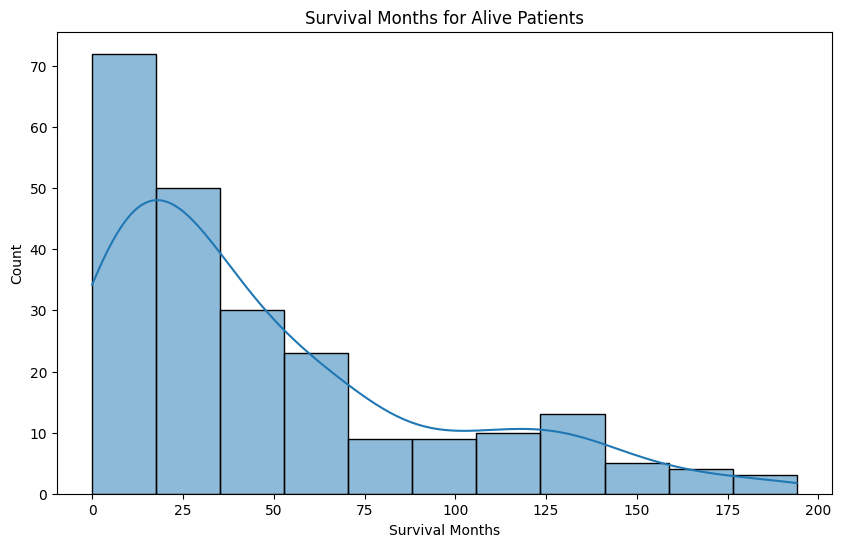

In [62]:
# plot the survival months when the patient is alive
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered_test2[df_filtered_test2['Vital status recode (study cutoff used)'] == 'Alive']['Survival Months'], kde=True)
plt.title('Survival Months for Alive Patients')
plt.show()

In [63]:
# only keep the patients that are dead
df_filtered_test2 = df_filtered_test2[df_filtered_test2['Vital status recode (study cutoff used)'] == 'Dead'].copy()

# drop the 'Vital status recode (study cutoff used)' column
df_filtered_test2.drop(columns='Vital status recode (study cutoff used)', inplace=True)

In [64]:
# check shape and head
display(df_filtered_test2.shape, df_filtered_test2.head())

(947, 16)

,Patient ID,Histologic Type ICD-O-3,Year of diagnosis,Sex,Race,Radiation recode,Age,Marital Status,Chemotherapy,Surgery,T,N,M,Grouped Stage,Tumor Size,Survival Months
154636,62012497,8045,2004,Male,White,0,65-69 years,Married,0,0,T2,N2,M1,IV,40,1
154644,62010191,8045,2004,Female,White,1,35-49 years,Married,1,1,T2,N2,M0,III,40,97
154707,62055106,8045,2004,Female,White,1,35-49 years,Single,1,1,T1,N2,M0,III,30,14
154987,53263519,8045,2004,Male,Black,0,70-74 years,Single,0,1,T2,N0,M0,I,40,18
157075,54207748,8045,2004,Female,White,0,75-79 years,Unknown/Other,0,0,T2,N0,M0,I,45,57


In [ ]:
# save the cleaned data
df_filtered_test2.to_csv('Data\cleaned_data.csv', index=False)